In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.shape

(51717, 17)

In [8]:
df.drop('url', axis= 1, inplace=True)
df.drop('phone', axis= 1, inplace=True)
df.drop('address', axis= 1, inplace=True)
df.drop('menu_item', axis= 1, inplace=True)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [11]:
df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float))

In [12]:
df['rate'] = (df['rate'].astype(str).replace(['NEW', '-'], np.nan).str.replace('/5', '').astype(float))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  reviews_list                 51717 non-null  object 
 11  listed_in(type)              51717 non-null  object 
 12  listed_in(city)              51717 non-null  object 
dtypes: float64(2), i

In [14]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [15]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
df.dropna(subset=['location'], inplace=True)
df.dropna(subset=['rest_type'], inplace=True)
df.dropna(subset=['cuisines'], inplace=True)
df.dropna(subset=['approx_cost(for two people)'], inplace=True)

In [17]:
df['rate'].fillna(df['rate'].median(), inplace=True)

/tmp/ipykernel_36/852739215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].median(), inplace=True)


In [18]:
df['dish_liked'].fillna(df['dish_liked'].mode()[0], inplace=True)

/tmp/ipykernel_36/3962288892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dish_liked'].fillna(df['dish_liked'].mode()[0], inplace=True)


In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [20]:
df.duplicated().sum()

71

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
threshold = 50
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts < threshold].index
df['location'] = df['location'].replace(rare_locations, 'Other')

In [23]:
df['dish_liked'].value_counts().head(20)

dish_liked
Biryani                                                                               27835
Chicken Biryani                                                                          73
Friendly Staff                                                                           69
Waffles                                                                                  68
Paratha                                                                                  57
Masala Dosa                                                                              56
Rooftop Ambience                                                                         42
Coffee                                                                                   41
Pizza                                                                                    38
Burgers                                                                                  33
Cocktails                                                            

In [24]:
# نفصل الأصناف لقائمة
df['dish_list'] = df['dish_liked'].apply(lambda x: [d.strip() for d in x.split(',')])

# كل الأصناف الموجودة (سواء لوحدها أو في مجموعات)
all_dishes = set(df['dish_list'].sum())

# نعمل DataFrame جديد فيه كل صنف مرة واحدة لوحده
single_dishes_df = pd.DataFrame({'dish_liked': list(all_dishes)})

# نحذف أي صفوف فيها أكتر من صنف
df = df[df['dish_list'].apply(len) == 1]

# نوحدهم كلهم (اللي كانوا لوحدهم + اللي جايين من المجموعات)
Final_df = pd.concat([df[['dish_liked']], single_dishes_df], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [25]:
df.drop('dish_list', axis=1, inplace= True)

# Number of vegetarians

In [26]:
vegetarian_count = df[df['dish_liked'].str.contains('Vegetarian', case= False, na= False)].shape[0]
vegetarian_count

7

# Top resturant chains in Bangalore

In [27]:
bangalore_df = df[df['location'].str.contains('Bangalore', case= False, na= False)]
top_chains = bangalore_df['name'].value_counts().head(10)
top_chains

name
Jiyo Natural          14
Bhaijaan Barbeques     9
Burger Garden          9
BBQ Ride 46            8
Crepe Nation           8
As On Fire             6
Gourmet Food Truck     6
Fritz Haber            5
Supreme Biryani        5
Dilli ??               4
Name: count, dtype: int64

# Number of resturants don't accept online orders

In [28]:
df[df['online_order'] == 'No'].shape[0]

14434

# the ratio of resturants that provide and dont provide table booking

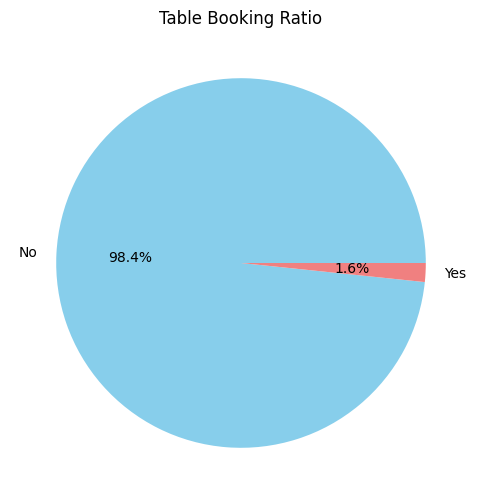

In [29]:
df['book_table'].value_counts().plot(
    kind= 'pie',
    autopct= '%1.1f%%',
    colors= ['skyblue', 'lightcoral'],
    figsize= (6,6),
    labels= ['No', 'Yes']
)
plt.title('Table Booking Ratio')
plt.ylabel('')
plt.show()

# Number of resturants by city

In [30]:
df['listed_in(city)'].value_counts().head(10)

listed_in(city)
BTM                      1905
Koramangala 7th Block    1599
Koramangala 5th Block    1565
Koramangala 4th Block    1471
Koramangala 6th Block    1405
Jayanagar                1338
JP Nagar                 1310
Bannerghatta Road        1115
Marathahalli             1086
HSR                      1044
Name: count, dtype: int64

# Rating distribution

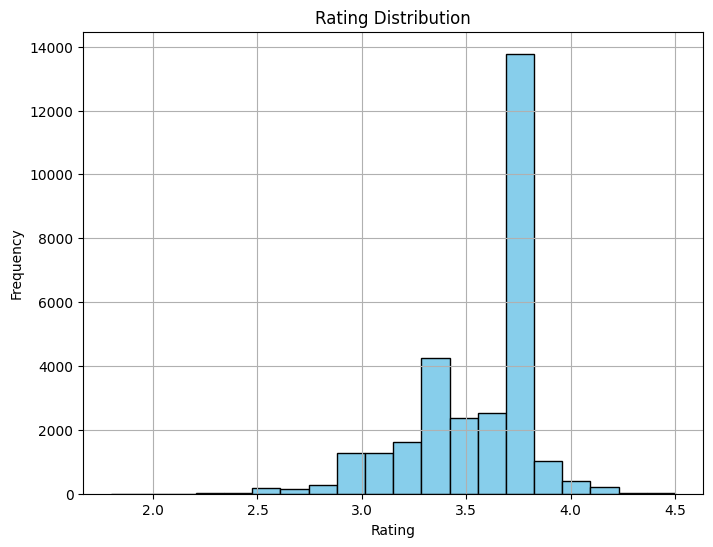

In [31]:
plt.figure(figsize = (8,6))
df['rate'].hist(bins=20, color= 'skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average cost for two by location

In [32]:
Avg_cost_location = df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)

In [33]:
df.drop('dish_liked', axis= 1, inplace= True)

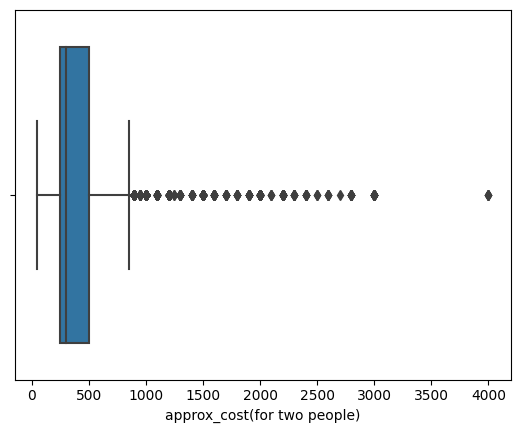

In [34]:
sns.boxplot(x = df['approx_cost(for two people)'])
plt.show()

In [35]:
df['approx_cost(for two people)'] = np.log1p(df['approx_cost(for two people)'])

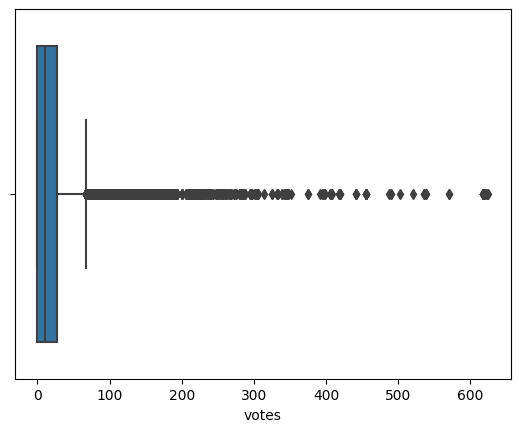

In [36]:
sns.boxplot(x = df['votes'])
plt.show()

In [37]:
df['votes'] = np.log1p(df['votes'])

In [38]:
def rate_category(rate):
    if rate >= 4.0:
        return 'High'
    elif rate >= 3.0:
        return 'Mediam'
    else:
        return 'Low'

df['rate'] = df['rate'].apply(rate_category)

In [39]:
df['rate'].value_counts()

rate
Mediam    27575
Low        1183
High        645
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['rate'] = le.fit_transform(df['rate'])
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])

In [41]:
df = pd.get_dummies(df, columns = ['name', 'location', 'rest_type', 'cuisines', 'reviews_list', 'listed_in(type)', 'listed_in(city)'], drop_first=True)

In [42]:
x = df.drop('rate', axis = 1)
y = df['rate']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
model = LogisticRegression(class_weight= 'balanced', multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [45]:
y_pred = model.predict(X_test)

In [46]:
logistic_regression = accuracy_score(y_test, y_pred)
print("Accuracy: ", logistic_regression)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9722836252338037

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       145
           1       0.71      0.90      0.80       232
           2       0.99      0.98      0.99      5504

    accuracy                           0.97      5881
   macro avg       0.82      0.94      0.87      5881
weighted avg       0.98      0.97      0.97      5881



In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Accuracy:  0.972963781669784

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       145
           1       0.98      0.55      0.70       232
           2       0.97      1.00      0.99      5504

    accuracy                           0.97      5881
   macro avg       0.98      0.73      0.82      5881
weighted avg       0.97      0.97      0.97      5881



In [54]:
model_rbf = SVC(class_weight= 'balanced', kernel='rbf', C=1)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
svm_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF):", svm_rbf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy (RBF): 0.8882843053902397

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.94      0.60       145
           1       0.32      0.97      0.49       232
           2       1.00      0.88      0.94      5504

    accuracy                           0.89      5881
   macro avg       0.59      0.93      0.67      5881
weighted avg       0.96      0.89      0.91      5881



In [55]:
model_rbf = SVC(class_weight= 'balanced', kernel='linear', C=1)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
svm_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF):", svm_rbf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy (RBF): 0.9863968712803944

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       145
           1       0.89      0.84      0.87       232
           2       0.99      0.99      0.99      5504

    accuracy                           0.99      5881
   macro avg       0.94      0.92      0.93      5881
weighted avg       0.99      0.99      0.99      5881



In [56]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (23522, 17293)
Shape of X_test: (5881, 17293)


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
data_scaled=scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [79]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [80]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

In [81]:
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
 )

In [87]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8977 - loss: 0.8339
Epoch 2/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9386 - loss: 0.4021
Epoch 3/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9392 - loss: 0.3105
Epoch 4/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9360 - loss: 0.2914
Epoch 5/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9360 - loss: 0.2828
Epoch 6/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9392 - loss: 0.2699
Epoch 7/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9366 - loss: 0.2771
Epoch 8/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9390 - loss: 0.2696
Epoch 9/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9400 - loss: 0.2657
Epoch 10/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9388 - loss: 0.2693


In [88]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.2734
Test Accuracy: 0.9359
Test loss: 0.2810
